# Inne przekształcenia dyskretne

W praktyce cyfrowego przetwarzania sygnałów wykorzystuje się również inne liniowe przekształcenia dyskretne. Do najpopularniejszych z nich możemy zaliczyć przekształcenie Walsha-Hadamarda (DWHT) i dyskretne przekształcenie kosinusowe drugiego rodzaju (DCT). 

### Dyskretne przekształcenie Walsha

Znajduje zastosowania w zadaniach kodowania i kompresji sygnałów. Jego podstawową zaletą jest brak operacji mnożenia. Przekształcenie to można wyznaczyć jedynie z użyciem operacji dodawania i odejmowania. Przekłada się to na prostotę implementacji programowych i sprzętowych. 

Przekształcenie to możemy zdefiniować rekurencyjnie. Niech $W_N$ oznacza macierz $N$-punktowego przekształcenia Walsha-Hadamarda i niech $N$ będzie całkowitą potęgą dwóch. Wówczas:

$W_N=\left[\begin{matrix}I_{\frac{N}{2}} & I_{\frac{N}{2}} \\ I_{\frac{N}{2}} & -I_{\frac{N}{2}}\end{matrix}\right]\left[\begin{matrix}W_{\frac{N}{2}} & O_{\frac{N}{2}} \\ O_{\frac{N}{2}} & W_{\frac{N}{2}}\end{matrix}\right]$,

gdzie indeks dolny opisuje rozmiar macierzy, $I_{\frac{N}{2}}$ oznacza macierz jednostkową, a $O_{\frac{N}{2}}$ to macierz złożona z samych zer. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

Poniżej prezentujemy szybką implementację przekształcenia Walsha-Hadamarda. Przekształcenie odwrotne (IDWHT) jest tym samym przekształceniem z dokładnością do współczynnika skalującego. Skalowanie przez wartość będącą całkowitą potęgą dwóch może być jednak zrealizowane jako operacja przesunięcia bitowego w prawo.

In [2]:
def DWHT(x):

	N=len(x)
	n=int(np.ceil(np.log(N)/np.log(2)))
	X=np.copy(x)
	nb=N//2
	ne=1
	for i in range(0,n):
		for j in range(0,nb):
			for k in range(0,ne):
				i1=2*j*ne+k
				i2=i1+ne
				t=X[i1]+X[i2]
				X[i2]=X[i1]-X[i2]
				X[i1]=t
		ne<<=1
		nb>>=1
	return X

Funkcje bazowe przekształcenia Walsha-Hadamarda nie są przebiegami harmonicznymi. Z powodu braku mnożeń przyjmują one jedynie wartośći ze zbioru $\{-1,0,1\}$. Poniższy kod pozwala zobaczyć postać macierzy przekształcenia i tym samym postaci funkcji bazowych.

W:
 [[ 1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1. -1.  1. -1.  1. -1.  1. -1.]
 [ 1.  1. -1. -1.  1.  1. -1. -1.]
 [ 1. -1. -1.  1.  1. -1. -1.  1.]
 [ 1.  1.  1.  1. -1. -1. -1. -1.]
 [ 1. -1.  1. -1. -1.  1. -1.  1.]
 [ 1.  1. -1. -1. -1. -1.  1.  1.]
 [ 1. -1. -1.  1. -1.  1.  1. -1.]]

Funkcje bazowe:


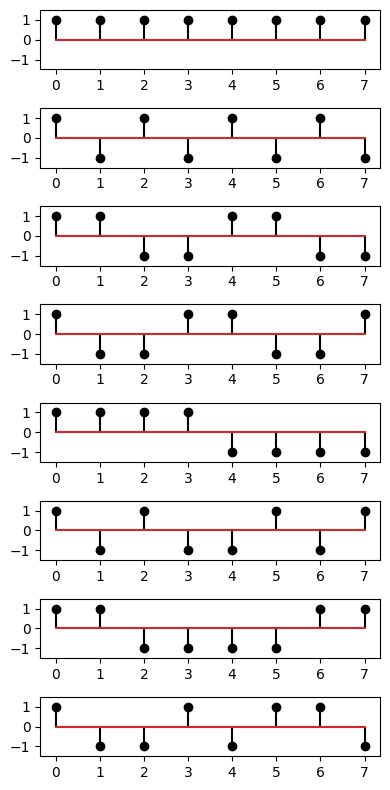

In [3]:
N=8
W=np.zeros((N,N),float)
for i in range(0,N):
	x=np.zeros(N,float)
	x[i]=1
	W[i]=DWHT(x)
W=np.transpose(W)
print('W:\n',W)
print('\nFunkcje bazowe:')
fig,axs=plt.subplots(N)
fig.set_size_inches(4,8)
for i in range(0,N):
	axs[i].set_ylim(-1.5,1.5)
	axs[i].stem(W[i],'k.')
plt.tight_layout()
plt.show()

Bardzo często stosuje się przemieszanie funckji bazowych zgodnie z rosnącą sekwencją, tj. liczbą przejść przez zero. Mówimy wówczas o uporządkowaniu Hadamarda.

### Dyskretne przekształcenie kosinusowe

Jest przekształceniem zbliżonym poprzez kształt funkcji bazowych do przekształcenia Fouriera i może być obliczane w oparciu o przekształcenie Fouriera. Definiujemy je w następujący sposób:

$X_C(k)=\displaystyle c_k\sum_{n=0}^{N-1}x(n)\cos\left(\frac{\pi}{2N}k(2n+1)\right)$

dla $k=0,1,...,N-1$, gdzie $c_k$ to współczynnik skalujący:

$c_k=\left\{\begin{matrix}1 & \textrm{dla }k=0,\\\sqrt{2} & \textrm{dla }k\ne0 \end{matrix}\right.$

Funkcje bazowe przekształcenia DCT przyjmują postaci:

U:
 [[ 1.    1.    1.    1.    1.    1.    1.    1.  ]
 [ 1.39  1.18  0.79  0.28 -0.28 -0.79 -1.18 -1.39]
 [ 1.31  0.54 -0.54 -1.31 -1.31 -0.54  0.54  1.31]
 [ 1.18 -0.28 -1.39 -0.79  0.79  1.39  0.28 -1.18]
 [ 1.   -1.   -1.    1.    1.   -1.   -1.    1.  ]
 [ 0.79 -1.39  0.28  1.18 -1.18 -0.28  1.39 -0.79]
 [ 0.54 -1.31  1.31 -0.54 -0.54  1.31 -1.31  0.54]
 [ 0.28 -0.79  1.18 -1.39  1.39 -1.18  0.79 -0.28]]


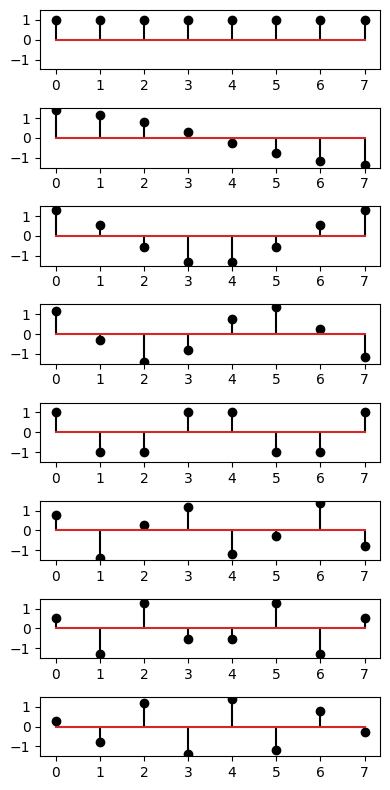

In [4]:
N=8
U=np.zeros((N,N),float)
for k in range(0,N):
	if (k==0):
		ck=1
	else:
		ck=math.sqrt(2)
	for n in range(0,N):
		U[k][n]=ck*math.cos(math.pi/(2*N)*k*(2*n+1))
print('U:\n',np.round(U,2))
fig,axs=plt.subplots(N)
fig.set_size_inches(4,8)
for i in range(0,N):
	axs[i].set_ylim(-1.5,1.5)
	axs[i].stem(U[i],'k.')
plt.tight_layout()
plt.show()

Szybkie obliczanie dyskretnego przekształcenia kosinusowego jest możliwe z wykorzystaniem algorytmu FFT. Rozważmy następujący przykład.

In [5]:
def DCT(x):

	N=len(x)
	X=np.zeros(N,float)
	for k in range(0,N):
		if (k==0):
			ck=1
		else:
			ck=math.sqrt(2)
		for n in range(0,N):
			X[k]=X[k]+ck*x[n]*math.cos(math.pi/(2*N)*k*(2*n+1))
	return X

x1=np.array([0,1,2,3,4,5,6,7])
X1=DCT(x1)
print('X:',np.round(X1,2))
x2=np.array([0,2,4,6,7,5,3,1])
X2=np.fft.fft(x2)
for k in range(0,N):
    if (k==0):
        ck=1
    else:
        ck=math.sqrt(2)
    X2[k]=X2[k]*ck*np.exp(-1j*math.pi*k/(2*N))
X2=np.real(X2)
print('X:',np.round(X2,2))

X: [ 28.   -18.22  -0.    -1.9   -0.    -0.57  -0.    -0.14]
X: [ 28.   -18.22   0.    -1.9    0.    -0.57   0.    -0.14]


Dokładny sposób obliczania DCT na bazie DFT, i tym samy FFT, został opisany w materiałach wykładowych.

Przekształcenie kosinusowe znajduje szerokie zastosowania w stratnej kompresji danych. Zostało wykorzystane chociażby w bardzo popularnym standardzie kompresji obrazów naturalnych JPEG. Wybór tego przekształcenia jest spowodowany jego świetnymi właściowościami, które są kluczowe z punktu widzenia kompresji. Mamy tutaj na myśli kondensację energii w możliwie eniwielkiej liczbie współczynników przekształcenia. Własność ta jest prawdziwa dla sygnałów wolnozmiennych, w szczególności modelowanych jako proces Markowa o wysokim współczynniku korelacji $\rho=0.95$. Własność ta wynika po części z innego ważnego faktu - specyficznej własności symetrii przekształcenia, którą prezentujemy poniżej.

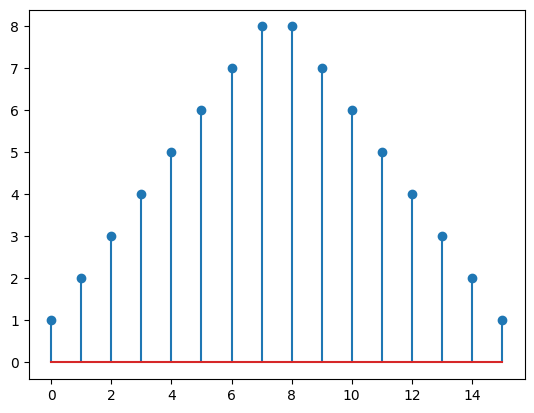

In [6]:
N=8
x=np.array([1,2,3,4,5,6,7,8])
X=DCT(x)
z=np.zeros(2*N,float)
for n in range(0,2*N):
	for k in range(0,N):	
		if (k==0):
			ck=1
		else:
			ck=math.sqrt(2)
		z[n]=z[n]+ck*X[k]*math.cos(math.pi/(2*N)*(2*n+1)*k)
z/=N
plt.stem(z)
plt.show()

W przypadku przekształcenia Fouriera zakłada się okresowe powtórzenie sygnału. Jeśli próbki sygnału na jego początku i końcu różnią się znacznie, to powstaje nieciągłość, dla przedstawienia której wymagane są wysokie częstotliwości.

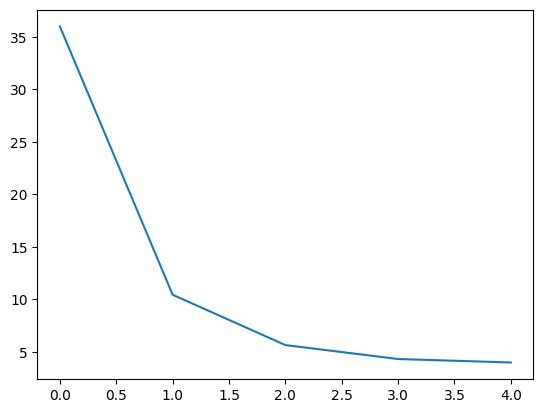

In [7]:
N=8
x=np.array([1,2,3,4,5,6,7,8])
Xf=np.abs(np.fft.fft(x))
plt.plot(Xf[0:N//2+1])
plt.show()

W przypadku przekształcenia kosinusowego symetria taka wygląda w inny sposób. Nie jest to okresowe powtórzenie sygnału, ale powtórzenie z odbiciem. Dzięki temu bez względu na postać sygnału takie nieciągłości nie powstają na krańcach przedziałów.

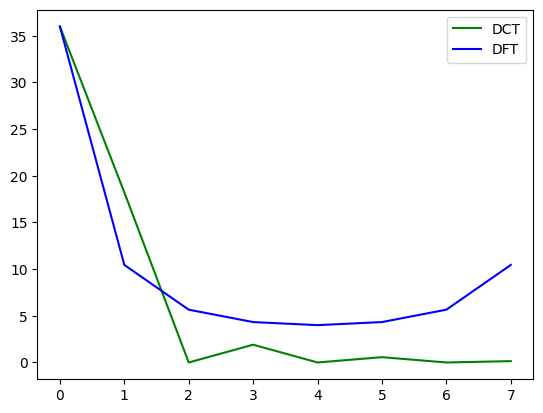

In [8]:
N=8
x=np.array([1,2,3,4,5,6,7,8])
Xc=np.abs(DCT(x))
plt.plot(Xc,'g')
plt.plot(Xf,'b')
plt.legend(['DCT','DFT'])
plt.show()

Poniżej sprawdźmy własność kondensacji energii przez przekształcenie DCT i porównajmy je z przekształceniem DWHT. Jako sygnał wejściowy bierzemy pod uwagę wektory będące realizacjami procesu Markowa 1-szego rzędu dla zadanej wartości współczynnika korelacji.

In [9]:
M=1000
N=8
q=0.95
x=np.zeros((M,N),float)
v=np.zeros(N,float)
Rx=np.matrix(np.zeros((N,N)))
for i in range(0,M):
	x[i][0]=random.gauss(0,1)
	for j in range(1,N):
		x[i][j]=q*x[i][j-1]+random.gauss(0,math.sqrt(1-q*q))
	Rx=Rx+np.matrix(x[i]).T*np.matrix(x[i])
Rx/=M
print('Macierz autokorelacji.')
print('Rx:\n',np.round(Rx,2))

Macierz autokorelacji.
Rx:
 [[0.94 0.91 0.88 0.84 0.8  0.73 0.7  0.67]
 [0.91 0.98 0.95 0.9  0.86 0.79 0.75 0.72]
 [0.88 0.95 1.02 0.97 0.93 0.85 0.81 0.77]
 [0.84 0.9  0.97 1.03 0.99 0.92 0.87 0.83]
 [0.8  0.86 0.93 0.99 1.05 0.97 0.92 0.88]
 [0.73 0.79 0.85 0.92 0.97 1.   0.94 0.9 ]
 [0.7  0.75 0.81 0.87 0.92 0.94 0.97 0.93]
 [0.67 0.72 0.77 0.83 0.88 0.9  0.93 0.98]]


Kondensacja energii.


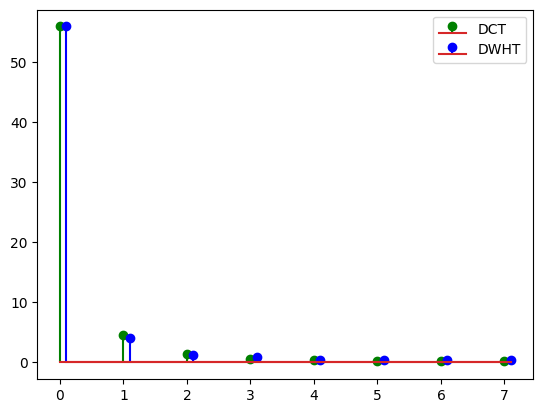

In [10]:
v1=np.zeros(N,float)
v2=np.zeros(N,float)
for i in range(0,M):
    X1=DCT(x[i])
    v1=v1+X1**2
    X2=DWHT(x[i])
    v2=v2+X2**2
v1/=M
v2=np.sort(v2/M)[::-1]
print('Kondensacja energii.')
plt.stem(v1,'g')
plt.stem(np.arange(0,N)+0.1,v2,'b')
plt.legend(['DCT','DWHT'])
plt.show()

In [11]:
p1=np.power(np.round(np.prod(v1),2),1/N)
p2=np.power(np.round(np.prod(v2),2),1/N)
print('DCT  :',p1)
print('DWHT :',p2)
print('ratio:',np.round(p1/p2,2))

DCT  : 1.0313385377212458
DWHT : 1.2756007098423185
ratio: 0.81


Błąd kwantyzacji z użyciem przekształcenia DCT będzie o $20\%$ niższy.

---